In [129]:
%matplotlib qt
import math  
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date  

In [130]:
df = pd.read_csv("covid19cases_test.csv")

In [131]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                          datetime64[ns]
area                                  object
area_type                             object
population                           float64
cases                                float64
cumulative_cases                     float64
deaths                               float64
cumulative_deaths                    float64
total_tests                          float64
cumulative_total_tests                 int64
positive_tests                       float64
cumulative_positive_tests              int64
reported_cases                       float64
cumulative_reported_cases            float64
reported_deaths                      float64
cumulative_reported_deaths           float64
reported_tests                       float64
dtype: object

In [132]:
df['date2'] = '2020-02-01'
df['date2'] = pd.to_datetime(df['date2'])

In [133]:
df['date_offset'] = (df['date'] - df['date2']).dt.days

In [134]:
df['normalized_cases'] = df['cases']/df['population']
df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests,date2,date_offset,normalized_cases
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,0.0,0.000002
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,1.0,0.000000
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,2.0,0.000000
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,3.0,0.000000
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,4.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43915,2022-01-16,Yuba,County,79290.0,38.0,12967.0,0.0,78.0,162.0,139454,56.0,15124,560.0,12760.0,0.0,101.0,2038.0,2020-02-01,715.0,0.000479
43916,2022-01-17,Yuba,County,79290.0,83.0,13050.0,0.0,78.0,259.0,139713,108.0,15232,111.0,12871.0,0.0,101.0,366.0,2020-02-01,716.0,0.001047
43917,2022-01-18,Yuba,County,79290.0,64.0,13114.0,0.0,78.0,150.0,139863,75.0,15307,100.0,12971.0,0.0,101.0,405.0,2020-02-01,717.0,0.000807
43918,2022-01-19,Yuba,County,79290.0,0.0,13114.0,0.0,78.0,NaN,139863,NaN,15307,143.0,13114.0,3.0,104.0,399.0,2020-02-01,718.0,0.000000


In [135]:
yuba = df[df['area'] == 'Yuba']
yuba

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests,date2,date_offset,normalized_cases
43200,2020-02-01,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,0.0,0.000000
43201,2020-02-02,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,1.0,0.000000
43202,2020-02-03,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,2.0,0.000000
43203,2020-02-04,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,3.0,0.000000
43204,2020-02-05,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,2020-02-01,4.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43915,2022-01-16,Yuba,County,79290.0,38.0,12967.0,0.0,78.0,162.0,139454,56.0,15124,560.0,12760.0,0.0,101.0,2038.0,2020-02-01,715.0,0.000479
43916,2022-01-17,Yuba,County,79290.0,83.0,13050.0,0.0,78.0,259.0,139713,108.0,15232,111.0,12871.0,0.0,101.0,366.0,2020-02-01,716.0,0.001047
43917,2022-01-18,Yuba,County,79290.0,64.0,13114.0,0.0,78.0,150.0,139863,75.0,15307,100.0,12971.0,0.0,101.0,405.0,2020-02-01,717.0,0.000807
43918,2022-01-19,Yuba,County,79290.0,0.0,13114.0,0.0,78.0,NaN,139863,NaN,15307,143.0,13114.0,3.0,104.0,399.0,2020-02-01,718.0,0.000000


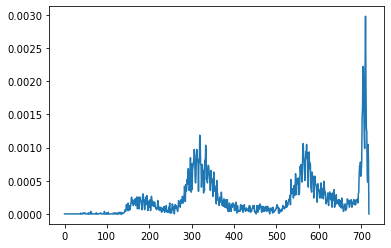

In [145]:
%matplotlib inline
fig, axes = plt.subplots()
axes.plot(yuba['date_offset'], yuba['normalized_cases'])
plt.show()


In [146]:
safe_cols_df = df.drop(columns=['date', 'area', 'area_type'])
medians_df = safe_cols_df.groupby(['date_offset']).median().reset_index()
Q1= safe_cols_df.groupby(['date_offset']).quantile(0.25).reset_index()
Q3= safe_cols_df.groupby(['date_offset']).quantile(0.75).reset_index()

In [147]:
Q1 = Q1.rolling(7).mean()
Q3 = Q3.rolling(7).mean()
medians_df = medians_df.rolling(7).mean()

/var/folders/q7/c7_w048s46z5fvk1pz07pvzm0000gn/T/ipykernel_81943/1115471549.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date2'], dtype='object')
  Q1 = Q1.rolling(7).mean()
/var/folders/q7/c7_w048s46z5fvk1pz07pvzm0000gn/T/ipykernel_81943/1115471549.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date2'], dtype='object')
  Q3 = Q3.rolling(7).mean()


In [148]:
#Q1= df.groupby(['date_offset']).quantile(0.25).reset_index()
#Q3= df.groupby(['date_offset']).quantile(0.75).reset_index()
#med = df.groupby(['date_offset']).median().reset_index()


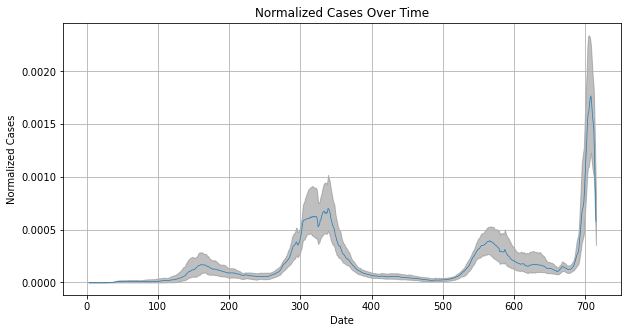

In [149]:
plt.figure(figsize=(10, 5))

plt.fill_between(medians_df['date_offset'],Q1['normalized_cases'],Q3['normalized_cases'],color= 'grey',alpha=0.5)

plt.plot(medians_df['date_offset'], medians_df['normalized_cases'],linewidth = 0.7)
plt.title('Normalized Cases Over Time')

plt.xlabel('Date')
plt.ylabel('Normalized Cases')
plt.grid(True)
plt.show()
